In [2]:
import pandas as pd

In [3]:
heart = pd.read_csv("heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
#Columns cp, fbs, restecg, exang, slope, ca, and thal are all categorical (or encoded)
#First, lets see how balanced age and sex are
ages = heart["age"]
ages.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [6]:
#The data seems to have a 2:1 ratio for the sexes
sexes = heart["sex"]
sexes.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

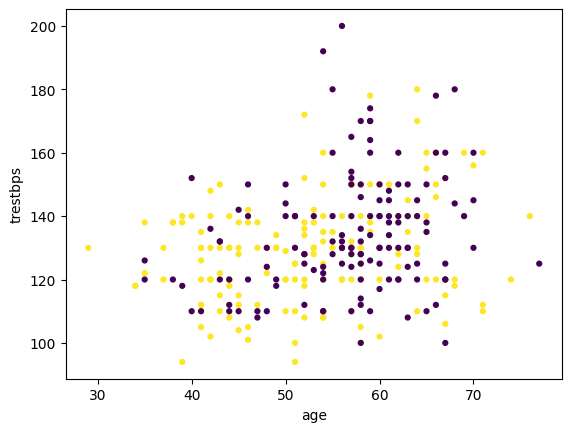

In [8]:
#Comparing age with trestbps, with purple=target of 0 and yellow=target of 1
import matplotlib.pyplot as plt
plt.scatter(heart.age , heart.trestbps , s=12, marker='o', c=heart.target)
plt.xlabel('age')
plt.ylabel('trestbps')
plt.show()

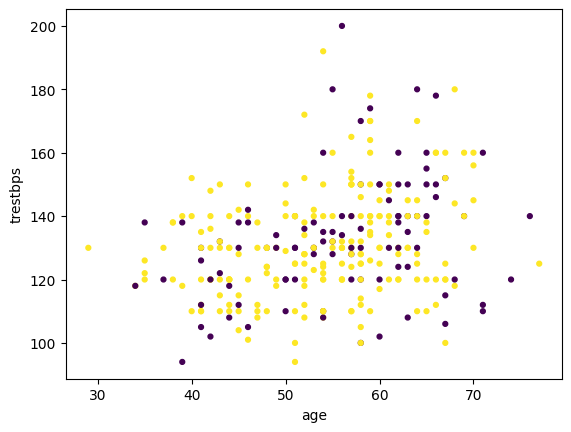

In [15]:
#Comparing age with trestbps, with purple=sex of 0 and yellow=sex of 1
plt.scatter(heart.age , heart.trestbps , s=12, marker='o', c=heart.sex)
plt.xlabel('age')
plt.ylabel('trestbps')
plt.show()

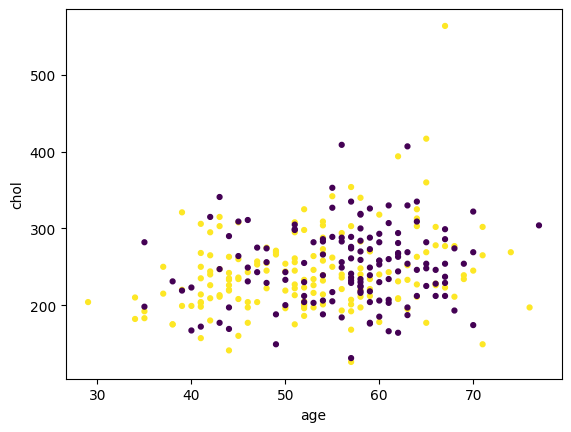

In [16]:
#Comparing age with chol, with purple=target of 0 and yellow=target of 1
plt.scatter(heart.age , heart.chol , s=12, marker='o', c=heart.target)
plt.xlabel('age')
plt.ylabel('chol')
plt.show()

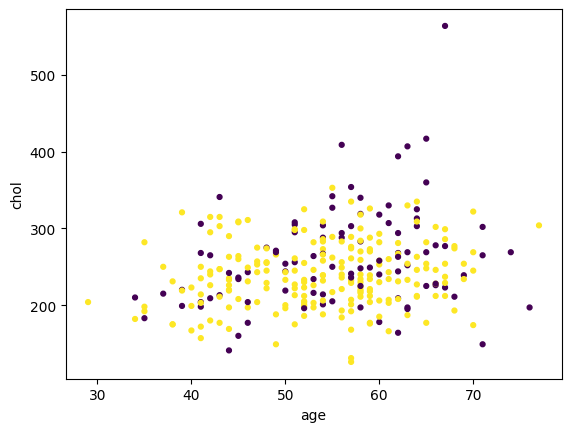

In [17]:
#Comparing age with chol, with purple=sex of 0 and yellow=sex of 1
plt.scatter(heart.age , heart.chol , s=12, marker='o', c=heart.sex)
plt.xlabel('age')
plt.ylabel('chol')
plt.show()

In [35]:
#Comparing sex with target
pd.crosstab(heart['sex'], heart['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [38]:
#Comparing fbs with target
#Based on this table, fbs does not have much impact, so I will not be including it in my final model.
pd.crosstab(heart['fbs'], heart['target'])

target,0,1
fbs,,
0,116,142
1,22,23


In [42]:
#Comparing restecg with target
#Though there doesn't seem to be much impact, there seems to be an indication that a restecg of 1 is more likely to yield a target of 1
#based on this data, so I will still include restecg in my final model.
pd.crosstab(heart['restecg'], heart['target'])

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


In [45]:
#Comparing exang with target
pd.crosstab(heart['exang'], heart['target'])

target,0,1
exang,,
0,62,142
1,76,23


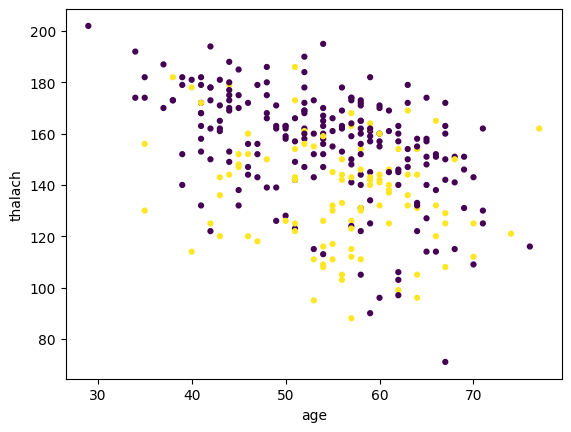

In [49]:
#Comparing age with thalach, with purple=exang of 0 and yellow=exang of 1
#While exang is supposed to indicate a target of 1, we have an unbalanced 2:1 ratio of those with and without exang, and as a result, the
#data indicated the opposite. Since exang still appears to have a relation to other features, I will keep it in my model.
plt.scatter(heart.age , heart.thalach , s=12, marker='o', c=heart.exang)
plt.xlabel('age')
plt.ylabel('thalach')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
#Training a model with features cp, trestbps, chol, thalach, oldpeak
columns_to_drop = ['fbs', 'slope', 'ca', 'thal', 'exang', 'restecg', 'age', 'sex']
data_1 = heart.drop(columns_to_drop, axis=1)
X = data_1.drop('target', axis=1)
Y = data_1['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)

In [57]:
print(accuracy_score(Y_pred, Y_test))
print(confusion_matrix(Y_pred, Y_test))

0.8131868131868132
[[30  3]
 [14 44]]


In [120]:
#Since this is a medical setting, I found this model to be slightly better. Though it has the same accuracy, 
#it has more true positives and less false negatives than other models I had
#Training model with features cp, chol, thalach, oldpeak, thal
columns_to_drop = ['fbs', 'slope', 'ca', 'exang', 'restecg', 'age', 'sex', 'trestbps']
data_2 = heart.drop(columns_to_drop, axis=1)
G = data_2.drop('target', axis=1)
F = data_2['target']
G_train, G_test, F_train, F_test = train_test_split(G, F, test_size = 0.30, random_state = 0)

In [117]:
log_reg = LogisticRegression()
log_reg.fit(G_train, F_train)
F_pred = log_reg.predict(G_test)

In [118]:
print(accuracy_score(F_pred, F_test))
print(confusion_matrix(F_pred, F_test))

0.8131868131868132
[[32  5]
 [12 42]]
